### **Task 2: Predicting Customer Buying Behavior**  

**Objective**: Build a predictive model to understand and analyze the factors influencing customer booking behavior.  

This task involves leveraging machine learning techniques to create a classification model for predicting customer buying behavior. The process includes:  
- **Exploratory Data Analysis (EDA)**: Analyzing the dataset to understand its structure, statistical properties, and uncover meaningful patterns.  
- **Data Preparation**: Applying feature engineering techniques to prepare the dataset for modeling.  
- **Model Building**: Developing a classification model using machine learning libraries to predict whether a customer is likely to book a flight.  
- **Evaluation and Insights**: Evaluating model performance and extracting insights to understand customer behavior better.  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = 'customer_booking.csv'

In [4]:
import chardet

with open('customer_booking.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
df = pd.read_csv("customer_booking.csv", encoding= 'ISO-8859-1')

In [6]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
df.shape

(50000, 14)

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

# Mutual Information 

In [11]:
x = df.drop('booking_complete', axis = 1)
y = df.booking_complete

In [12]:
#changing object dtype to int dtype
for colname in x.select_dtypes("object"):
    x[colname],_ = x[colname].factorize()

In [13]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [14]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x,y)
mi_scores= pd.Series(mi_scores, name="MI Scores", index = x.columns)
mi_scores = mi_scores.sort_values(ascending= False)
mi_scores

route                    0.052140
booking_origin           0.047008
flight_duration          0.018191
wants_extra_baggage      0.010127
length_of_stay           0.007832
wants_in_flight_meals    0.003711
purchase_lead            0.003706
sales_channel            0.003615
wants_preferred_seat     0.003315
num_passengers           0.003054
flight_hour              0.003015
flight_day               0.002650
trip_type                0.001025
Name: MI Scores, dtype: float64

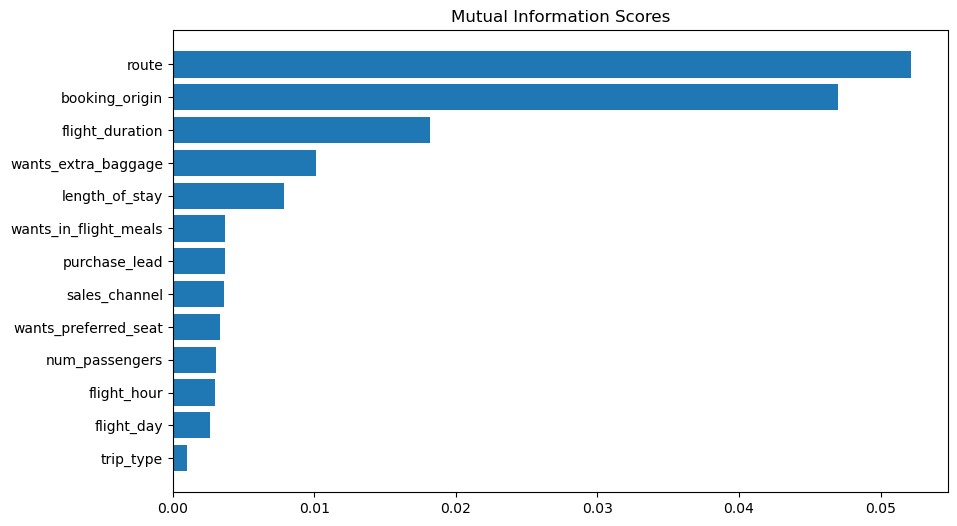

In [15]:
def plot_mi_score(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi = 100, figsize = (10,6))
plot_mi_score(mi_scores)

# Train Test split 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
def dataset(x,y):
    train_full_x, val_x, train_full_y, val_y = train_test_split(x,y,test_size= 0.2, random_state= 42)
    
#     use the same function above for the validation set
    train_x, test_x, train_y, test_y = train_test_split(train_full_x, train_full_y, test_size= 0.25, random_state= 42)
    return (train_x, val_x,train_y, val_y)

In [49]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x

# Model 1 : Random forest classifier with top 6 features

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [26]:
feature = ['route','booking_origin','flight_duration','wants_extra_baggage','wants_in_flight_meals']

x= df[feature]

# one hot encoding
x= pd.get_dummies(x, columns= feature)
x = scale(x)
y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x,y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_val)


print('Accuracy : ', accuracy_score(y_val,y_pred)*100)
print("AUC Score: ",roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
confusion_matrix(y_val, y_pred)


Accuracy :  84.15
AUC Score:  0.5482727445755615
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8520
           1       0.39      0.13      0.20      1480

    accuracy                           0.84     10000
   macro avg       0.63      0.55      0.55     10000
weighted avg       0.80      0.84      0.81     10000



array([[8220,  300],
       [1285,  195]], dtype=int64)

# Model 2 : Random forest classifier with all features

In [61]:
x = df.drop('booking_complete',axis =1)

#one hot encoding 
x= pd.get_dummies(x)
x = scale(x)
y = df.booking_complete

x_train, x_val,y_train, y_val = dataset(x,y)

rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(x_train,y_train)
y_pred1 = rf_model1.predict(x_val)

print('Accuracy : ', accuracy_score(y_val,y_pred1)*100)
print("AUC Score: ",roc_auc_score(y_val, y_pred1))
print(classification_report(y_val, y_pred1))
confusion_matrix(y_val, y_pred1)


Accuracy :  85.22999999999999
AUC Score:  0.546236200989722
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.50      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



array([[8358,  162],
       [1315,  165]], dtype=int64)

# Model 3 : XGB classifier with top 6 features

In [34]:
from xgboost import XGBClassifier

In [36]:
x = df[feature]

#one hot encoding

x = pd.get_dummies(x, columns= feature)
x = scale(x)
y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x,y)
xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_val)

print('Accuracy : ', accuracy_score(y_val,pred_xgb)*100)
print("AUC Score: ",roc_auc_score(y_val, pred_xgb))
print(classification_report(y_val, pred_xgb))
confusion_matrix(y_val, pred_xgb)

Accuracy :  85.11999999999999
AUC Score:  0.5062301738358077
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.43      0.02      0.03      1480

    accuracy                           0.85     10000
   macro avg       0.64      0.51      0.48     10000
weighted avg       0.79      0.85      0.79     10000



array([[8488,   32],
       [1456,   24]], dtype=int64)

# Model 4 : XGB classifier with all features

In [60]:
x =df.drop('booking_complete', axis = 1)

x =pd.get_dummies(x)
x =scale(x)
y =df.booking_complete

x_train, x_val, y_train, y_val = dataset(x,y)

xgb_model1 = XGBClassifier()

xgb_model1.fit(x_train, y_train)
pred_xgb1 = xgb_model1.predict(x_val)

print('Accuracy : ', accuracy_score(y_val,pred_xgb1)*100)
print("AUC Score: ",roc_auc_score(y_val, pred_xgb1))
print(classification_report(y_val, pred_xgb1))
confusion_matrix(y_val, pred_xgb1)



Accuracy :  85.18
AUC Score:  0.5378473543966501
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.50      0.09      0.16      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000



array([[8382,  138],
       [1344,  136]], dtype=int64)

# Model 5 : Decision Tree classifier with top 6 features

In [40]:
from sklearn.tree import DecisionTreeClassifier

x = df[feature]

#one hot encoding

x = pd.get_dummies(x, columns= feature)
x = scale(x)
y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x,y)
dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_val)

print('Accuracy : ', accuracy_score(y_val,pred_dt)*100)
print("AUC Score: ",roc_auc_score(y_val, pred_dt))
print(classification_report(y_val, pred_dt))
confusion_matrix(y_val, pred_dt)

Accuracy :  84.31
AUC Score:  0.5480951021443979
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8520
           1       0.41      0.13      0.20      1480

    accuracy                           0.84     10000
   macro avg       0.64      0.55      0.55     10000
weighted avg       0.80      0.84      0.81     10000



array([[8240,  280],
       [1289,  191]], dtype=int64)

# Model 6 : Decision Tree classifier with all features

In [53]:
x =df.drop('booking_complete', axis = 1)

x =pd.get_dummies(x)
x =scale(x)
y =df.booking_complete

x_train, x_val, y_train, y_val = dataset(x,y)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_val)

print('Accuracy : ', accuracy_score(y_val,pred_dt)*100)
print("AUC Score: ",roc_auc_score(y_val, pred_xgb))
print(classification_report(y_val, pred_xgb))
confusion_matrix(y_val, pred_xgb)

Accuracy :  79.08
AUC Score:  0.5378473543966501
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.50      0.09      0.16      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000



array([[8382,  138],
       [1344,  136]], dtype=int64)

# After Stratified Sampling 

In [55]:
def dataset_1(x,y):
    train_full_x1, val_x1, train_full_y1, val_y1 = train_test_split(x,y,test_size= 0.2, random_state= 42, stratify=y)
    
#     use the same function above for the validation set
    train_x1, test_x1, train_y1, test_y1 = train_test_split(train_full_x1, train_full_y1, test_size= 0.25, random_state= 42,stratify=y)
    return (train_x1, val_x1,train_y1, val_y1)

In [56]:
feature = ['route','booking_origin','flight_duration','wants_extra_baggage','wants_in_flight_meals']

x= df[feature]

# one hot encoding
x= pd.get_dummies(x, columns= feature)
x = scale(x)
y = df.booking_complete

x_train1, x_val1, y_train1, y_val1 = dataset(x,y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train1, y_train1)

y_pred = rf_model.predict(x_val1)


print('Accuracy : ', accuracy_score(y_val1,y_pred)*100)
print("AUC Score: ",roc_auc_score(y_val1, y_pred))
print(classification_report(y_val1, y_pred))
confusion_matrix(y_val1, y_pred)


Accuracy :  84.15
AUC Score:  0.5482727445755615
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8520
           1       0.39      0.13      0.20      1480

    accuracy                           0.84     10000
   macro avg       0.63      0.55      0.55     10000
weighted avg       0.80      0.84      0.81     10000



array([[8220,  300],
       [1285,  195]], dtype=int64)

Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other models

In [62]:
x= df.drop('booking_complete', axis= 1)
x = pd.get_dummies(x)
x = scale(x)

y = df.booking_complete

train_full_x , test_x, train_full_y, test_y = train_test_split(x,y,test_size= 0.2, random_state=42)

# rf_model1 = RandomForestClassifier(random_state=42)

rf_model1.fit(train_full_x,train_full_y)
y_pred11 = rf_model1.predict(test_x)



In [63]:
print('Accuracy : ', accuracy_score(test_y,y_pred11)*100)
print("AUC Score: ",roc_auc_score(test_y, y_pred11))
print(classification_report(test_y, y_pred11))
confusion_matrix(test_y, y_pred11)

Accuracy :  85.41
AUC Score:  0.5545505012054308
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



array([[8350,  170],
       [1289,  191]], dtype=int64)